# Python для анализа данных

## Регулярные выражения (Regular Expressions)

На основе блокнота *Аллы Тамбовцевой, НИУ ВШЭ*

Дополнения 1: *Татьяна Рогович, НИУ ВШЭ*

Дополнения 2: *Ян Пиле, ВК*

### Введение в регулярные выражения

Регулярные выражения ‒ выражения, последовательности символов, которые позволяют искать совпадения в тексте. Выражаясь более формально, они помогают найти подстроки определенного вида в строке. Еще о регулярных выражениях можно думать как о шаблонах, в которые мы можем подставлять текст, и этот текст либо соответствует шаблону, либо нет. В самом простом случае в качестве регулярного выражения может использоваться обычная строка. 

Возьмем две первых строки из известной считалки Агаты Кристи и попытаемся найти в них слово "обедать". 
Для этого можно воспользоваться оператором in. Он проверяет точное вхождение одной строки в другую и возвращает логическое значение: True, если вхождение есть, и False в противном случае.

In [ ]:
pwd = 'SDDGbnmsfb1nm_~!'

if любая буква in pwd:
    ok
if любая цифра

In [11]:
' '<'!'

True

In [6]:
# 'my new string, , '
# (',', ':', 1)
str.replace??

In [ ]:
'my new string, , '.replace

In [8]:
string = 'Десять негритят отправились обедать, \
          Один поперхнулся, их осталось девять.'
# слово "обедать" маленькими буквами есть в строке
'обедать' in string

# exp1: 'my_exp_id_1', exp2:

True

In [2]:
# а если мы попытаемся поискать слово "Обедать" с большой буквы, то оператор вернет False
'Обедать' in string

False

In [3]:
'[слов]'
# 'a'<'A'

'[A-z]'

In [ ]:
'[0-9]'

In [ ]:
# '[а-я]'
a_1

In [87]:
import requests
import re
from random import randint

def get_don_quixot():
    the_idiot_url = 'https://raw.githubusercontent.com/rcdm-uga/Gutenberg_Text/refs/heads/master/Cervantes%20Saavedra%2C%20Miguel%20de/The%20History%20of%20Don%20Quixote%2C%20Volume%201%2C%20Complete.txt'

    # Отправляем запрос в библиотеку Gutenberg и забираем текст
    raw = requests.get(the_idiot_url).text
    #Заменим в тексте все небуквенные символы на пробелы
    processed_book = re.sub('\W+' , ' ', raw).lower()
    return processed_book

don_quixot = get_don_quixot()

In [88]:
from collections import Counter

In [89]:
len(re.findall(r'\d+', don_quixot))

173

In [90]:
len(Counter(re.findall(r'\d+', don_quixot)))

83

In [95]:

Counter([str(i)[0] for i in re.findall(r'\d+', don_quixot)])

Counter({'1': 100,
         '5': 14,
         '3': 12,
         '2': 11,
         '8': 8,
         '9': 8,
         '4': 7,
         '6': 6,
         '7': 4,
         '0': 3})

In [63]:
cnt = Counter(re.findall(r'\w+', don_quixot))

In [73]:
# [i[1] for i in cnt.most_common(100)]

In [74]:
freq = [i[1] for i in cnt.most_common(100)]

In [69]:
mc = freq[0]

In [75]:
mc = freq[0]
expected = [mc/i for i in range(1,101)]

In [76]:
import matplotlib.pyplot as plt

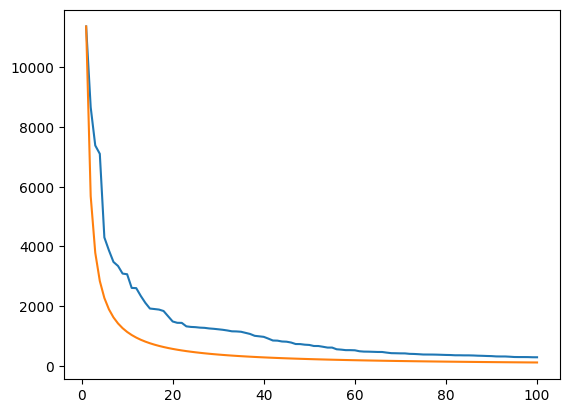

In [78]:
_ = plt.plot(range(1,101), freq)
_ = plt.plot(range(1,101), expected)

In [57]:
Counter([2,2,2,2,3,4,5,64,53,2,2,2]).most_common(10)

[(2, 7), (3, 1), (4, 1), (5, 1), (64, 1), (53, 1)]

Видно, что слово *Один* начинается с большой буквы. Что, если мы хотим найти в некоторой строке слово *Один* вне зависимости от регистра, то есть все слова типа *Один, один, ОДИН* и т.д.? Эту задачу все еще можно решить без регулярных выражений: привести всю строку к нижнему регистру и искать слово *один*. 
А что, если у нас будет текст подлиннее (например, полный текст считалки), и в нем необходимо найти все числительные от одного до десяти во всех падежах (один/одного/двое/двоим и т.д.)? В такой ситуации удобнее написать некоторый шаблон, чтобы не создавать длинный список слов с разными формами слов. Тут на помощь придут регулярные выражения. 

* Промежутки, заключенные в квадратные скобки, позволяют найти цифры или буквы разных алфавитов и разных регистров 


    [0-9] соответствует любой цифре
    
    [A-Z] соответствует любой заглавной букве английского алфавита
    
    [a-z] соответствует любой строчной букве английского алфавита
    
    [А-Я] и [а-я] ‒ аналогично для букв русского алфавита (кроме буквы ё/Ё - ее нужно включать отдельно!)

* Для обозначения произвольного символа (кроме новой. строки) используется  точка ‒ `.`.

* Для цифр есть специальный символ `\d` (от *digit*) ≈`[0-9]` . Добавление обратного слэша называется экранированием: так мы отмечаем, что ищем именно цифру, а не просто букву d. 

* Для любого символа, кроме цифры тоже есть специальный символ `\D` (от *digit*)≈`[^0-9]` (заглавная буква здесь отвечает за отрицание). Добавление обратного слэша называется экранированием: так мы отмечаем, что ищем именно цифру, а не просто букву d. 

* Для пробела тоже существует свой символ ‒ `\s` (от *space*) ≈`[ \f\n\r\t\v]`. Этот символ соответствует ровно одному пробельному символу в тексте (пробел, табуляция, перенос строки и т.д.).

* Любой непробельный символ, обозначается как `\S` (заглавная буква здесь отвечает за отрицание).

* Для букв тоже существует свой символ ‒ `\w` (от *word*) ≈ `[0-9a-zA-Zа-яА-ЯёЁ]`. Любая буква (то, что может быть частью слова), а также цифры и _ .

* Любая не-буква, не-цифра и не подчёркивание, обозначается как `\W` (заглавная буква здесь отвечает за отрицание).


### Комментарий
Мы сейчас будем использовать конструкцию re.search(pattern,string).group(0) \
Она ищет первое вхождение паттерна в строку. (чуть позже систематически в этом разберемся)

In [4]:
import re

In [49]:
st = '6666/ 675ÖA445SD4t3y\t5w674455JH.GFKZXNёFADHM \t йпарвыолфы 456  4n5арыфолорыф56h'

# re.search(r'^\w+$', st)
# Про начало-конец строки глянуть

In [50]:
re.findall(r'\d{3,5}', st)

['6666', '675', '445', '67445', '456']

In [30]:
# Найти в строке string первую строчку, подходящую под шаблон pattern == re.search(pattern, string)
st = 'ёёёёёё     $%^&*ё6789ёабв'
re.search(r'\D+',st).group()

'ёёёёёё     $%^&*ё'

Здесь нашлось абв, потому что в диапазон а-я буква ё не входит!

In [43]:
# Найти в строке string первую строчку, подходящую под шаблон pattern == re.search(pattern, string)
st = 'ёёёёёёёёабв'
re.search(r'\+',st).group(0)

'ёёёёёёёёабв'

In [44]:
# Найти в строке string первую строчку, подходящую под шаблон pattern == re.search(pattern, string)
st = 'Револ_юция Übung \t\nпроизошл@#$%^&а в 1917 году'
re.findall(r'[^а-яА-Я]+',st)

['_', ' Übung \t\n', '@#$%^&', ' ', ' 1917 ']

In [66]:
# Найти в строке string первую строчку, подходящую под шаблон pattern == re.search(pattern, string)
st = 'Революция произошла в 1917 году'
re.search(r'\D+',st).group(0)

'Революция произошла в '

In [31]:
# Найти в строке string первую строчку, подходящую под шаблон pattern == re.search(pattern, string)
# Мы добежали до первого пробельного символа
st = 'Революция произошла в 1917 году 34'
re.findall(r'\d+',st)

['1917', '34']

Для разбора дальнейших символов в регулярных выражениях, создадим небольшой набор слов (не очень осмысленный, но удобный):

     хах, хех, хаааа, xaxa

* Знак `.` соответствует одному любому символу в строке. Так, регулярное выражение `x.x` "поймает" слова *хах* и *хех*.
* Знак `+` соответствует одному или более вхождению символа(ов), который стоит слева от `+`. Выражение `xa+` "поймает" слова *xa* и *хаааа*.
* Знак `*` соответствует нулю или более вхождениям символа, который стоит слева от `*`.  Выражение `xaх*`  "поймает" слова *xa* и *хах*.
* Знак `?` соответствует нулю или одному вхождению символа, который стоит слева от `?`.  Выражение `xa?`  "поймает" все последовательности *xa* и буквы *x*.
До сих пор мы рассматривали поиск определенной последовательности символов. Но что, если у нас нет определенного шаблона, и нам надо вернуть набор символов из строки, отвечающий определенным правилам? Такая задача часто стоит при извлечении информации из строк. Это можно сделать, написав выражение с использованием специальных символов. Вот наиболее часто используемые из них:

- **\b**	Граница слова
- **[..]**	Один из символов в скобках ([^..] — любой символ, кроме тех, что в скобках)
- **\**	Экранирование специальных символов (\. означает точку или \+ — знак «плюс»)
- **^ и $**	Начало и конец строки соответственно
- **{n,m}**	От n до m вхождений ({,m} — от 0 до m)
- **a|b**	Соответствует a или b
- **()**	Группирует выражение и возвращает найденный текст
- **\t, \n, \r**	Символ табуляции, новой строки и возврата каретки соответственно

In [80]:
st = "хахх, хех, хаааа+++, хахххххххах"
re.findall(r'\++',st)

['+++']

In [81]:
re.findall(r'х.х?',st)

['хах', 'х,', 'хех', 'ха', 'хах', 'ххх', 'ххх']

In [83]:
st = "хах, хех, хаааа, хаххххххххха"
re.findall(r'хах*',st) #ха из хаааа, т.к * говорит нам что слева должно быть ха и справа 0 или бесконечно число х

['хах', 'ха', 'хаххххххххх']

In [48]:
st = "хах, хех, ?хаа..аа, хаха 3456 456 56436743"
re.findall(r'\d{3}',st) #? говорит нам, что слева должен быть один х, а справа 0 или 1 а. 
# Соответственно ха и х из хах; х и х из хех; и ха из хааа; ха ха из хаха

['345', '456', '564', '367']

Как быть, если с помощью регулярного выражения нужно найти подстроку, содержащую знаки препинания? Те же точки, вопросительные знаки, скобки? Нужно их экранировать ‒ ставить перед ними `\`, например, `\.`, `\,`, `\?`. Это символ будет сообщать Python, что нам нужен именно конкретный символ (точка, запятая, знак вопроса и др.). 

В регулярных выражениях можно явно задавать число повторений символов. Если мы знаем точное число символов, то его можно указать в фигурных скобках. Так, выражение `а{4}` будет соответствовать четырем буквам `a` подряд. Если точное число повторений нам неизвестно, можно задать диапазон, указав начало и конец отрезка через запятую. Например, такое выражение позволит найти от двух до четырех букв `a` подряд: `a{2,4}`. Если известен только левый или правый конец отрезка, то второй конец можно опустить: `a{2,}` (не менее двух) или `a{,4}` (не более 4).

В регулярных выражениях также можно использовать условие *или*. Например, возвращаясь к нашей "смеющейся" строке, если мы напишем выражение `x[а|е]х`,  оно поймает слова *хах* и *хех*, а вот вдруг появившийся *хох* не поймает.



In [30]:
st = "хах, хех, ?хаа..аа, хаха"
re.findall(r'х[ае]х',st)

['хах', 'хех', 'хах']

In [ ]:
mailto: email_address

Создадим какой-нибудь незамысловатый текст с разными датами:

In [84]:
text = "12 ноября 2011 года произошло удивительное событие. А 13 ноября 2012 - еще удивительнее. Даже не будем \
говорить, что произошло 2 декабря 2011 года и 99 декабря 3012 года."
text

'12 ноября 2011 года произошло удивительное событие. А 13 ноября 2012 - еще удивительнее. Даже не будем говорить, что произошло 2 декабря 2011 года и 99 декабря 3012 года.'

Напишем регулярное выражение, которое будет соответствовать всем цифрам в тексте (не числам), и найдем их все в `text` с помощью функции `findall()`:

In [88]:
re.findall(r"[123]?\d\s[а-яё]+\s\d{4}", text) # отдельно цифры

['12 ноября 2011', '13 ноября 2012', '2 декабря 2011', '9 декабря 3012']

Если забыли, что числа можно искать с помощью `\d`, можно задействовать промежуток (только не забудьте квадратные скобки):

In [9]:
re.findall("[0-9]", text)

['1',
 '2',
 '2',
 '0',
 '1',
 '1',
 '1',
 '3',
 '2',
 '0',
 '1',
 '2',
 '2',
 '2',
 '0',
 '1',
 '1',
 '2',
 '5',
 '2',
 '0',
 '1',
 '2']

А что, если мы хотим "ловить" не цифры, а числа, то есть последовательности из одной или более цифры. Условию "один и более" соответствует символ `+`. Попробуем.

In [10]:
re.findall("\d+", text) # отдельно числа

['12', '2011', '13', '2012', '2', '2011', '25', '2012']

Получилось! А если сочетания по 1-2 цифры (иногда с пробелом после)? Тут нужен знак `.`, который отвечает ровно за один символ. 

In [12]:
re.findall("\d.", text) # отдельно числа по 1-2 цифры

['12', '20', '11', '13', '20', '12', '2 ', '20', '11', '25', '20', '12']

Что будет, если мы воспользуемся знаком `?`? Он отвечает за наличие 0 или 1 символа, стоящего слева от регулярного выражения.

In [13]:
re.findall("\d?", text) # по 1 символу

['1',
 '2',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '2',
 '0',
 '1',
 '1',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '1',
 '3',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '2',
 '0',
 '1',
 '2',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '2',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '2',
 '0',
 '1',
 '1',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '2',
 '5',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '2',
 '0',
 '1',
 '2',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

Получили какое-то безобразие. Но это безобразие оправдано: добавив `?` мы поставили условие, что в подстроке либо есть ровно одна цифра, либо ее нет. Поэтому мы и получили такой странный список. 

**Задание 1:** написать регулярное выражение, которое будет "ловить" все годы в тексте.

*Решение:*

In [55]:
re.findall(r"\d{4}", text) # 4 цифры подряд

['2011', '2012', '2011', '3012']

А что, если в тексте будут элементы из 4 цифр, которые не будут годами?

In [95]:
text = "По_ имеющимся данным: в Екатеринбургской губернии на май 1916_, года было занято 50611 военнопленных,\
из них 134194 на фабричных и заводских работах, 5731 на «казённых», 5060 на сельскохозяйственных,\
4145 на железнодорожных, 913 на городских и земских, 568 на прочих"
text

'По_ имеющимся данным: в Екатеринбургской губернии на май 1916_, года было занято 50611 военнопленных,из них 134194 на фабричных и заводских работах, 5731 на «казённых», 5060 на сельскохозяйственных,4145 на железнодорожных, 913 на городских и земских, 568 на прочих'

In [97]:
re.findall(r"\b[а-яА-ЯёЁ]+[_\b]", text) # 4 цифры подряд

['По_']

**Задание 2:** написать регулярное выражение, которое будет "ловить" все слова с основой *удивительн* в тексте.

*Решение:*

In [91]:
text = "12 ноября 2011 года произошло удивительное событие. А 13 ноября 2012 - еще удивительнее. Даже не будем \
говорить, что произошло 2 декабря 2011 года и 25 декабря 2012 года."
re.findall("удивительн..", text) # из текста знаем, что больше двух букв после не будет

['удивительное', 'удивительнее']

Теперь давайте вместе напишем регулярное выражение, которое будет соответствовать датам с годами. Как выглядят даты в нашем тексте? Сначала идет одна цифра или более, затем пробел, далее буквенное название месяца, пробел и снова цифры, но теперь уже ровно 4, так как они складываются в год. Как обозначаются цифры мы знаем, русские буквы тоже. пробелу соответствует символ `\s` (обратный слэш обязателен, так как без него это будет обычная буква *s*).

In [92]:
#Число, пробел, набор букв, пробел, четыре цифры
re.findall("\d+\s[а-я]+\s\d{4}", text) # осталось прочитать регулярку по слогам :)

['12 ноября 2011', '13 ноября 2012', '2 декабря 2011', '25 декабря 2012']

Теперь давайте рассмотрим еще один пример. Пусть у нас есть список твитов, только список учебный, вместо полного текста одни хэштеги. 

In [3]:
tweets = ["#я не могу молчать", "#я не могу кричать", "#я не могу", "#я справлюсь", "я не могу молчать",
        "#я не могу жить", "#я все могу", "#с кем не бывает"]

Задача: создать новый список, содержащий только твиты, начинающиеся с `#я не могу`. Сначала напишем регулярное выражение и посмотрим, как оно работает.

In [99]:
tweets = "#я не могу молчать #я не могу кричать #я не могу #я справлюсь я не могу молчать #я не могу жить #я все могу #с кем не бывает"

In [100]:
re.findall("#я не могу \w*", tweets)

['#я не могу молчать', '#я не могу кричать', '#я не могу ', '#я не могу жить']

Рассмотрим какую-нибудь задачу, где необходимо применить экранирование. Пусть у нас есть некоторая строка с данными:

In [99]:
data = '20.05.1963, 55, 12.12.2000, 17, 15/11/2004'

In [100]:
re.findall('\d{2}[\./]\d{2}[\./]\d{4}', data)

['20.05.1963', '12.12.2000', '15/11/2004']

И нам нужно выбрать из нее даты, записанные через точку. Напишем регулярное выражение, которое позволит это сделать, но перед этим вспомним, что точку нужно экранировать ‒ ставить перед ней `\`, чтобы Python понимал, что мы ищем не один любой символ (`.`), а именно точку как знак препинания. 

In [43]:
re.findall("\d+\.\d+.\d{4}", data) # готово

['20.05.1963', '12.12.2000']

In [104]:
re.

До этого мы работали только с функциями `findall` и `search`(не особенно в них разбираясь), но в модуле `re` есть и другие полезные функции. Вот наиболее часто используемые из них:

- `re.match()`
- `re.search()`
- `re.findall()`
- `re.split()`
- `re.sub()`
- `re.compile()`

Рассмотрим их подробнее.

### re.match(pattern, string):
Этот метод ищет по заданному шаблону в начале строки. Например, если мы вызовем метод `match()` на строке «Сидоров Иван Иванович» с шаблоном «Сидоров», то он завершится успешно. Однако если мы будем искать «Иван», то результат будет отрицательный. Давайте посмотрим на его работу:

In [104]:
result = re.match(r'\d+\w+', '1223ghjhgtyuiСидоров Иван Петрович')
print(result)

<re.Match object; span=(0, 20), match='1223ghjhgtyuiСидоров'>


Искомая подстрока найдена. Чтобы вывести ее содержимое, используем метод `group()`. (Мы используем «r» перед строкой шаблона, чтобы показать, что это «сырая» строка в Python).

In [115]:
result.start()

0

Теперь попробуем найти «Иван» в данной строке. Поскольку строка начинается с фамилии, метод вернет `None`:

In [119]:
result = re.match(r'Иван', 'Сидоров Иван Петрович')
print(result)

None


Также есть методы `start()` и `end()` для того, чтобы узнать начальную и конечную позицию найденной строки.

In [118]:
result = re.match(r'Сидоров', 'Сидоров Иван Петрович')
print(result.start())
print(result.end())

0
7


Эти методы иногда очень полезны для работы со строками.

In [117]:
import re
re.subn??

### re.search(pattern, string):
Этот метод похож на `match()`, но он ищет не только в начале строки. В отличие от предыдущего, `search()` вернет объект, если мы попытаемся найти «Иван».

In [120]:
result = re.search(r'Иван', 'Сидоров Иван Петрович')
result

<re.Match object; span=(8, 12), match='Иван'>

Метод `search()` ищет по всей строке, но возвращает только первое найденное совпадение.

### re.split(pattern, string, [maxsplit=0]):
Этот метод разделяет строку по заданному шаблону.

In [122]:
result = re.split(r'[^а-яА-ЯёЁ]+', 'Сидоров6572385326%$^%Иван Петрович')
result

['Сидоров', 'Иван', 'Петрович']

В примере мы разделили нашу строку по пробелам. Метод `split()` принимает также аргумент `maxsplit` со значением по умолчанию, равным 0. В данном случае он разделит строку столько раз, сколько возможно, но если указать этот аргумент, то разделение будет произведено не более указанного количества раз. Давайте посмотрим на примеры:

In [123]:
result = re.split(r' ', 'Сидоров Иван Петрович',maxsplit=1)
result

['Сидоров', 'Иван Петрович']

Мы установили параметр `maxsplit` равным 1, и в результате строка была разделена на две части вместо трех.

Приведем "боевой" пример. У нас есть некоторая ссылка и её нужно разобрать на параметры, которые потом нужно обработать. Здесь видны адрес сайта, судя по всему, тип страницы, название товарной позиции и какой-то непонятный id \
https://beru.ru/product/konditsioner-dlia-belia-aroma-rich-fairy-lion-0-43-l-paket/100583881004

In [87]:
st = 'Hey guy'
re.findall(r'\b\w|\w\b',st)

['H', 'y', 'g', 'y']

In [124]:
site = 'https://beru.ru/product/konditsioner-dlia-belia-aroma-rich-fairy-lion-0-43-l-paket/100583881004'
result = re.split(r'\b/', site)
result

['https://beru.ru',
 'product',
 'konditsioner-dlia-belia-aroma-rich-fairy-lion-0-43-l-paket',
 '100583881004']

### re.compile(pattern, flags=0):
Компилирует объект регулярного выражения.для последующего использования.

In [127]:
text = 'hfjklhgadsfk_7fjhsdkl867589065,bhjk4\n \
        5jfnkld45'
digitRegex = re.compile(r'\d+') # Не менее 1 цифры

''' Сейчас мы их проверим...'''
digitRegex.split(text)

['hfjklhgadsfk_', 'fjhsdkl', ',bhjk', '\n         ', 'jfnkld', '']

In [138]:
digitRegex??

### re.sub(pattern, repl, string):
Этот метод ищет шаблон в строке и заменяет его на указанную подстроку. Если шаблон не найден, строка остается неизменной.

In [128]:
result = re.sub(r'[;,]', ' ', 'Сидоров;Иван,Петрович')
result

'Сидоров Иван Петрович'

In [129]:
re.sub??

In [5]:
import re
re.sub?

### Примеры задач с решением

### Задача 1. Извлечь все слова, начинающиеся на гласную

Для начала вернем все слова:

In [133]:
string = 'ого Десять негритят отправились обедать, \
          один поперхнулся, их осталось девять.'
re.findall(r'\b[^уеёэоаыиюя ,!]\w+\b', string)

['Десять', 'негритят', 'поперхнулся', 'девять']

А теперь — только те, которые начинаются на определенные буквы (используя `[]`):

In [91]:
re.findall(r'[аяоеуюыиэеАЯОЕУЮЫИЭ]\w+', string)

['есять',
 'егритят',
 'отправились',
 'обедать',
 'Один',
 'оперхнулся',
 'их',
 'осталось',
 'евять']

Что-то тут не так) Если слово не начинается с глачной, оно было обрезано до первой гласной. Для того, чтобы убрать их, используем `\b` для обозначения границы слова:

In [94]:
re.findall(r'\b[аяоеуюыиэеАЯОЕУЮЫИЭ]\w+', string)

['ОГО', 'отправились', 'обедать', 'Один', 'их', 'осталось']

Получили искомый результат. Но что если нам нужно получить слова начинающиеся с согласной буквы? Мы, конечно, можем их всех перечислить как гласные, но это не оптимальный способ. Мы можем использовать `^` внутри квадратных скобок для инвертирования группы:

In [66]:
re.findall(r'\b[^аяоеуюыиэеАЯОЕУЮЫИЭ]\w+', string)

['Десять',
 ' негритят',
 ' отправились',
 ' обедать',
 ' поперхнулся',
 ' осталось',
 ' девять']

В результат попали слова, «начинающиеся» с пробела. Уберем их, включив пробел в диапазон в квадратных скобках:

In [67]:
# слова, не начинающиеся с гласной или пробела
re.findall(r'\b[^аяоеуюыиэеАЯОЕУЮЫИЭ ]\w+', string)

['Десять', 'негритят', 'поперхнулся', 'девять']

### Задача 2. Проверить телефонный номер (номер должен быть длиной 10 знаков и начинаться с 7 или 8)

У нас есть телефонный номер и нам нужно проверить его, используя регулярные выражения:

In [134]:
val = '8999999999423456'


if re.match(r'?[7-8]\d{10}', val) and len(val) == 11:
    print('Да')
else:
    print ('Нет')

Нет


Для каждого номера мы проверям его по следующему паттерну: сначала стоит либо 7, либо 8 `[7-8]`, строго один раз `{1}`. Далее идет блок из любых цифр `[0-9]` длинной строго в 9 `{9}`. Ну и в конце мы проверяем длину "числа". Если все хорошо, помечаем номер как верный.`[0-9]` можно также заменить на `\d`, а `{1}` можно опустить. Потому что `[]` по умолчанию подразумевают наличие одного элемента из скобок.

In [151]:
val = '7999999999'

if re.match(r'[7-8]\d{10}', val) and len(val) == 11:
    print('Да')
else:
    print ('Нет')

Да


In [152]:
len(val)

10

In [136]:
numbers = ['С227НА777','КУ22777','Т22В7477','М227К19У9','С227НА8777']
# Теперь правильные ответы
Answers = ['Private','Taxi','Fail','Fail','Fail']

In [137]:
i = 0
lst = list()
while i < len(numbers): 
    if(re.match(r'[АВЕКМНОРСТУХ]\d{3}[АВЕКМНОРСТУХ]{2}\d{2,3}$', numbers[i]) is not None):
        lst.append('Private')
    elif (re.match(r'[АВЕКМНОРСТУХ]{2}\d{5,6}$', numbers[i]) is not None):
        lst.append('Taxi')
    else:
        lst.append('Fail')
    i+=1

In [138]:
lst

['Private', 'Taxi', 'Fail', 'Fail', 'Fail']

### Задача 3. Проверить номера автомобилей 

В России применяются регистрационные знаки нескольких видов. 
Общего в них то, что они состоят из цифр и букв. Причём используются только 12 букв кириллицы, \
имеющие графические аналоги в латинском алфавите — А, В, Е, К, М, Н, О, Р, С, Т, У и Х.

У частных легковых автомобилях номера — это буква, три цифры, две буквы, затем две или три цифры с \
кодом региона. У такси — две буквы, три цифры, затем две или три цифры с кодом региона. \
Есть также и другие виды, но в этой задаче они не понадобятся.

In [97]:
numbers = ['С227НА777','КУ22777','Т22В7477','М227К19У9','С227НА8777']
# Теперь правильные ответы
Answers = ['Private','Taxi','Fail','Fail','Fail']

In [ ]:
[Буквы, которые входят в номер]{1}\d{3}[Буквы, которые входят в номер]{2}\d{2,3}
[Буквы, которые входят в номер]{2}\d{5,6}

In [98]:
x = int(input('Введите номер примера для проверки:'))
num = numbers[x]

if re.match(r'[АВЕКМНОРСТУХ]{1}\d{3}[АВЕКМНОРСТУХ]{2}\d{2,3}', num) and len(num) in (8,9):
    print('Private')
elif re.match(r'[АВЕКМНОРСТУХ]{2}\d{5,6}', num) and len(num) in (7,8):
    print('Taxi')
else:
    print('Fail')


Введите номер примера для проверки:1
Taxi


In [70]:
r'hjfdksdajh{}754895'.format('d')

'hjfdksdajhd754895'

### Задача 4. Извлечь информацию из html-файла

Допустим, нам надо извлечь информацию из html-файла, заключенную между `<td>` и `</td>` (из таблицы), кроме первого столбца с номером. Также будем считать, что html-код содержится в строке.

Пример содержимого html-файла:

In [160]:
test_str = "1NoahEmma2LiamOlivia3MasonSophia4JacobIsabella5WilliamAva6EthanMia7MichaelEmily"

re.findall(r'\d([A-Z][a-z]+)([A-Z][a-z]+)', test_str)

[('Noah', 'Emma'),
 ('Liam', 'Olivia'),
 ('Mason', 'Sophia'),
 ('Jacob', 'Isabella'),
 ('William', 'Ava'),
 ('Ethan', 'Mia'),
 ('Michael', 'Emily')]

Для лучшего понимания строки, распишем ее в другом виде:

1. NoahEmma
2. LiamOlivia
3. MasonSophia
4. ...

Сначала мы ищем число, которое будет у нас означать начало новой строки в таблице (стартовую позицию поиска в строке) `\d`. После этого мы указываем, что имя начинается с заглавной буквы `[A-Z]`. Получим число и первую букву имени.

In [42]:
re.findall(r'\d[A-Z]', test_str)

['1N', '2L', '3M', '4J', '5W', '6E', '7M']

Далее забираем основную часть имени `[a-z]`, там уже строчные буквы. Используем модификатор `+`, чтобы взять все буквы.

In [47]:
re.findall(r'\d[A-Z][a-z]+', test_str)

['1Noah', '2Liam', '3Mason', '4Jacob', '5William', '6Ethan', '7Michael']

Но у нас в начале есть номер и имя с фамилией слеплены вместе. Сначала разберемся с номером: `()` позволяют нам указать, что мы будем выводить `([A-Z][a-z]+)`, число останется вне вывода и будет использоваться только для определения позиции следующего применения паттерна.

In [48]:
re.findall(r'\d([A-Z][a-z]+)', test_str)

['Noah', 'Liam', 'Mason', 'Jacob', 'William', 'Ethan', 'Michael']

Теперь займемся фамилией. По условию задачи мы знаем, что фамилия тоже начинается с заглавной буквы. Поэтому мы укажем второй (аналогичный имени) паттерн и занесем его в `()` для отдельного вывода

In [161]:
re.findall(r'\d([A-Z][a-z]+)([A-Z][a-z]+)', test_str)

[('Noah', 'Emma'),
 ('Liam', 'Olivia'),
 ('Mason', 'Sophia'),
 ('Jacob', 'Isabella'),
 ('William', 'Ava'),
 ('Ethan', 'Mia'),
 ('Michael', 'Emily')]

Как видно по выводу, фамилия теперь отображается как второй элемент первого вывода паттерна.

### Задача 5. Поиск однокоренных слов

Нужно в тексте найти все однокоренные слова. Будем выполнять на данной скороговорке:

Рыла свинья белорыла, тупорыла; полдвора рылом изрыла, вырыла, подрыла.

In [109]:
pig = "Рыла свинья рыл белорыла, тупорыла; полдвора рылом изрыла, вырыла, подрыла."
pig

'Рыла свинья белорыла, тупорыла; полдвора рылом изрыла, вырыла, подрыла.'

Корень может быть как в начале слова, так и где-то в середине. Поэтому учтем это. Сначала у нас могут быть буквы `[а-яА-Я]` длиной от 0 до бесконечности `*`

In [168]:
re.findall(r'[а-яА-Я]*(?:Рыл|рыл)[а-яА-Я]*', "Рыла свинья белорыла, тупорыла; полдвора рылом изрыла, вырыла, подрыла.")

['Рыла', 'белорыла', 'тупорыла', 'рылом', 'изрыла', 'вырыла', 'подрыла']

In [173]:
xx = 'xaxaxaxaxaxa'
re.findall(r'(?:xa)+', xx)

['xaxaxaxaxaxa']

Нам попались все слова и пробелы, так как `*`. Далее будем искать наш корень. Нам нужно точное совпадение с `рыл` или `Рыл` для случая с началом предложения `(?:рыл|Рыл)`. `|` говорит нам о выборе между `рыл` и `Рыл`, т.е. подойдет любой из них.

Что делает `(?:)` ? Этот символ помогает нам вернуть последовательность полностью. Выше мы уже видели, что, то, что последовательность в скобках соответствует формату вывода. В этом случае `(?:)` это меняет: если последовательность символов подходит ВСЕМУ шаблону, то оно и будет возвращено функцией findall.

Но если мы уберем ?:, то любая последовательность подходящая под внутренний паттерн скобок будет выведена.

In [63]:
re.findall(r'[а-яА-Я]*(?:рыл|Рыл)', "Рыла свинья белорыла, тупорыла; полдвора рылом изрыла, вырыла, подрыла.")

['Рыл', 'белорыл', 'тупорыл', 'рыл', 'изрыл', 'вырыл', 'подрыл']

Есть начало слова и его корень. Осталось добавить окончание. Все аналогично началу слова:

In [62]:
re.findall(r'[а-яА-Я]*(?:рыл|Рыл)[а-яА-Я]*', "Рыла свинья белорыла, тупорыла; полдвора рылом изрыла, вырыла, подрыла.")

['Рыла', 'белорыла', 'тупорыла', 'рылом', 'изрыла', 'вырыла', 'подрыла']

### Задача 6. Проверка пароля

На сайте нужно вывести сообщение, если пароль не валиден. \
Обычно пароль должен содержать не менее 8 символов, не менее одной заглавной буквы, \
не менее одной строчной буквы и, опционально, символ

"Your password must have at least 8 characters, at least an upper case letter, an lowercase letter,\
a number and probably a symbol so you make sure you’ll never remember it in the future"

In [140]:
import re

passwordText = 'fbbE4gfhdsjk'

# Strength Checks
# charRegex = re.compile(r'(.{8,})')  # Не менее 8 символов (тут не считаются знаки препинания)
lowerRegex = re.compile(r'[a-z]+') # Не менее 1 маленькой буквы
upperRegex = re.compile(r'[A-Z]+')# Не менее 1 большой буквы
digitRegex = re.compile(r'[0-9]+') # Не менее 1 цифры

''' Сейчас мы их проверим...'''
if len(passwordText) < 8:  
    print('Password must contain at least 8 symbols')
elif lowerRegex.findall(passwordText)==[]: 
    print('Password must contain at least one lowercase character')
elif upperRegex.findall(passwordText)==[]: 
    print('Password must contain at least one uppercase character')
elif digitRegex.findall(passwordText)==[]: 
    print('Password must contain at least one digit character')
else:  
    print('Your password is strong. Good job!')

Your password is strong. Good job!


In [143]:
s = 'x2x23x234x234axaxaxaxaxaxa gdfwhjsafhjkcsbfhbkl'

re.findall(r'(?:\w\d{2,3})+', s)

['x23x234x234']

## Группирующие скобки (...)

Если в шаблоне регулярного выражения встречаются скобки (...) без ?:, то они становятся группирующими. В match-объекте, который возвращают re.search, re.fullmatch и re.finditer, по каждой такой группе можно получить ту же информацию, что и по всему шаблону. А именно часть подстроки, которая соответствует (...), а также индексы начала и окончания в исходной строке. Достаточно часто это бывает полезно.

In [150]:
import re 
pattern = r'\s*([А-Яа-яЁё]+)(\d+)\s*' 

string = r'---   Опять45   ---' 

match = re.search(pattern, string) 

print(f'Найдена подстрока >{match[0]}< с позиции {match.start(0)} до {match.end(0)}') 

print(f'Группа букв >{match[1]}< с позиции {match.start(1)} до {match.end(1)}') 
print(f'Группа цифр >{match[2]}< с позиции {match.start(2)} до {match.end(2)}') 
### 
# -> Найдена подстрока >   Опять45   < с позиции 3 до 16 
# -> Группа букв >Опять< с позиции 6 до 11 
# -> Группа цифр >45< с позиции 11 до 13 

Найдена подстрока >   Опять45   < с позиции 3 до 16
Группа букв >Опять< с позиции 6 до 11
Группа цифр >45< с позиции 11 до 13


In [148]:
match[2]

'45'

In [78]:
s = 'It\'s been a long time'
match = re.search(r'(\s\w)(\w\w)', s) 
match[2]

'ee'

In [106]:
n = '6452317895631978657894165879265879234657438265656565656565782365789236578243657438216547382456493'

In [111]:
re.findall(r'(?:\d{2}){2,3}', n)

['645231',
 '789563',
 '197865',
 '789416',
 '587926',
 '587923',
 '465743',
 '826565',
 '656565',
 '656578',
 '236578',
 '923657',
 '824365',
 '743821',
 '654738',
 '245649']

In [ ]:
# Пары одинаковых цифр

## Заглядывание вперед и назад или позиционные шаблоны

Следующие шаблоны применяются в основном в тех случаях, когда нужно уточнить, что должно идти непосредственно перед или после шаблона, но при этом 
не включать найденное в match-объект.

* `(?=...)` lookahead assertion, соответствует каждой позиции, сразу после которой начинается соответствие шаблону 

* `(?!...)` negative lookahead assertion, соответствует каждой позиции, сразу после которой НЕ может начинаться шаблон
* `(?<=...)` positive lookbehind assertion, соответствует каждой позиции, которой может заканчиваться шаблон. Длина шаблона должна быть фиксированной, то есть abc и a|b — это ОК, а a* и a{2,3} — нет.

* `(?<!...)` negative lookbehind assertion, соответствует каждой позиции, которой НЕ может заканчиваться шаблон

In [103]:
string = 'КарлIV, КарлIX, КарлV, КарлVI, КарлVII, КарлVIII,ЛюдовикIX, \
ЛюдовикVI, ЛюдовикVII, ЛюдовикVIII, ЛюдовикX, ..., ЛюдовикXVIII, ФилиппI, \
ФилиппII, ФилиппIII, ФилиппIV, ФилиппV, ФилиппVI'
# Людовик, после которого первые два символа == VI
re.findall(r'Карл\w+',string)

['КарлIV', 'КарлIX', 'КарлV', 'КарлVI', 'КарлVII', 'КарлVIII']

In [104]:
string = 'КарлIV, КарлIX, КарлV, КарлVI, КарлVII, КарлVIII,ЛюдовикIX, ЛюдовикVI, ЛюдовикVII, ЛюдовикVIII, ЛюдовикX, ..., ЛюдовикXVIII, ФилиппI, ФилиппII, ФилиппIII, ФилиппIV, ФилиппV, ФилиппVI'
# Людовик, после которого первые два символа != VI
re.findall(r'Людовик(?!VI)\w{1,4}',string)

['ЛюдовикIX', 'ЛюдовикX', 'ЛюдовикXVII']

In [159]:
string = 'КарлIV, КарлIX, КарлV, КарлVI, КарлVII, КарлVIII,ЛюдовикIX, ЛюдовикVI, ЛюдовикVII, ЛюдовикVIII, ЛюдовикX, ..., ЛюдовикXVIII, ФилиппI, ФилиппII, ФилиппIII, ФилиппIV, ФилиппV, ФилиппVI'
# цифра, начинающаяся на VI, только если перед ней стоит Людовик
re.findall(r'\w*(?<=Людовик)VI\w{,2}',string)

['ЛюдовикVI', 'ЛюдовикVII', 'ЛюдовикVIII']

In [162]:
import re
string = 'КарлIV, КарлIX, КарлV, КарлVI, КарлVII, КарлVIII,ЛюдовикIX, ЛюдовикVI, ЛюдовикVII, ЛюдовикVIII, ЛюдовикX, ..., ЛюдовикXVIII, ФилиппI, ФилиппII, ФилиппIII, ФилиппIV, ФилиппV, ФилиппVI'
# цифра, начинающаяся на VI, только если перед ней НЕ стоит Людовик
re.findall(r'[А-Яа-я]*(?<!Людовик)VI\w{,2}',string)

['КарлVI', 'КарлVII', 'КарлVIII', 'VIII', 'ФилиппVI']

### Проверка пароля, дубль два
У нас уже была задачка про проверку пароля, которую мы реализовали через *if*. \
Давайте попробуем ее прогнать через одно регулярное выражение


**Должно быть:**
* Не менее 8 символов (тут не считаются знаки препинания)
* Не менее 1 маленькой буквы
* Не менее 1 большой буквы
* Не менее 1 цифры
* Без пробелов

In [163]:
import re

passwordText = '4fBt!hgjkfdl'

# Не менее 1 цифры, не менее 1 буквы, не менее 1 большой буквы и без пробелов
charRegex = re.compile(r'(?=^.{8,}$)(^(?=.*\d)(?=.*[a-z])(?=.*[^\w\s])(?=.*[A-Z])(?!.*\s).*).*$')  

''' Сейчас мы их проверим...'''
if charRegex.match(passwordText) is None:  
    print('FAIL')
else:  
    print('Your password is strong. Good job!')

Your password is strong. Good job!


И еще давайте туда же встроим проверку на наличие спецсимвола (запятая, точка, восклицательный знак, вопросительный знак)

In [8]:
passwordText = 'fbbE4fkT!'

# Не менее 1 цифры, не менее 1 буквы, не менее 1 большой буквы и без пробелов
d = ''
charRegex = re.compile(r'(?=^.{8,}$)((?=.*\d)(?=.*[a-z])(?=.*[,.!?])(?=.*[A-Z])(?!.*\s))')  

''' Сейчас мы их проверим...'''
if charRegex.match(passwordText) == None:  
    print('FAIL')
else:  
    print('Your password is strong. Good job!')

Your password is strong. Good job!


## Упражения

### 1. Достать из строки имена-фамилии на русском языке

In [104]:
users = 'Василий Зайцев, Erwin König, Людмила Павличенко, Josef Allerberger, Matthäus Hetzenauer, Александр Башлачёв'

Ответ: ['Василий Зайцев', 'Людмила Павличенко', 'Александр Башлачёв']

### 2. Выделить из строки email'ы 

'iawpghnube1206@gmail.com\r\n+79151489999 (telegram @vasiiesal) test.tewst2@subsubdomain.subdomain.domain.ru.!'

Для начала разобьем эту строку "по границам слов", то бишь по символам.
*findall(r'\b',x)* разобьет строку вот так:
* iawpghnube1206
* @
* gmail
* .
* com
* \
* r
* \
* n
* +
* 79151489999
* (
* telegram
* @
* vasiiesal
* test
* .
* tewst2
* @
* subsubdomain
* .
* subdomain
* .
* domain
* .
* ru
* .!

In [90]:
x = 'iawpgh-----nube1206@gmail.com\r\n+79151489999 (telegram @vasiiesal) test.tewst2@subsubdomain.subdomain.domain.ru.!'
re.findall(r'\b', x) # строки в выводе пустые, потому что не указали какой паттерн искать

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

Далее идет блок в `[ ]`, в котором как раз определяем паттерн, который ищем, в нашем случае это `S`, где `\S` любой непробельный символ. НО это только один символ, попадающий в эту маску. Для того чтобы получить неограниченную длинной последовательность, мы добави + к квадратным скобкам.

Получим такие вот подстроки:
- iawpghnube1206@gmail.com
- 79151489999
- telegram
- vasiiesal)
- test.tewst2!@subsubdomain.subdomain.domain.ru.!

In [91]:
re.findall(r'\b[\S]+', x)

['iawpgh-----nube1206@gmail.com',
 '79151489999',
 'telegram',
 'vasiiesal)',
 'test.tewst2@subsubdomain.subdomain.domain.ru.!']

`@` показывает нам, что далее нужно найти 1 символ `@`. Что даст следующие подстроки:

- iawpghnube1206@
- test.tewst2!@

In [92]:
re.findall(r'\b[\S]+@', x)

['iawpgh-----nube1206@', 'test.tewst2@']

После `@` всегда идет домен. Как говорилось выше он может иметь несколько уровней. Поэтому мы снова ищем последовательность из букв, цифр и спец знаков, причем данная последовательность встречается от 1 и более раз `{1,}`

Получим такие строки:
- iawpghnube1206@gmail.com'
- test.tewst2!@subsubdomain.subdomain.domain.ru.!

In [93]:
re.findall(r'\b[\S]+@[\S]{1,}', x)

['iawpgh-----nube1206@gmail.com',
 'test.tewst2@subsubdomain.subdomain.domain.ru.!']

Все выглядит хорошо, кроме того что мы захватили с собой лишние знаки. Однако мы знаем, что почта всегда заканчивается точкой и доменной зоной. Попробуем, это учесть. Укажем, что мы хотим ровно одну точку `\.` и неограниченное количество букв `\w+`.В данном случае мы прямо указываем на то что должны быть только буквы, цифры и спецсимволы не могу быть в доменной зоне. Получим:
- iawpghnube1206@gmail.com
- test.tewst2!@subsubdomain.subdomain.domain.ru

In [94]:
re.findall(r'\b[\w\d\S]+@[\w\d\S]{1,}\.\w+', x)

['iawpgh-----nube1206@gmail.com',
 'test.tewst2@subsubdomain.subdomain.domain.ru']

### А что если мы хотим обращаться прямо к найденным группам?

In [117]:
string = '32 32 32'
re.match(r'^(\d+)\s\1\s\1$', string)
# Тут мы обратились к первой найденной группе через \1

<re.Match object; span=(0, 8), match='32 32 32'>

### Решение 1

In [107]:
users = 'Василий Зайцев, Erwin König, Людмила Павличенко, Josef Allerberger, Matthäus Hetzenauer, Александр Башлачёв'
re.findall(r'[а-яА-ЯёЁ]+\s[а-яА-ЯёЁ]+',users)

['Василий Зайцев', 'Людмила Павличенко', 'Александр Башлачёв']

### Заключение
Сегодня мы познакомились с функциями из модуля `re`. Дополнительно про них можно почитать в официальной [документации](https://docs.python.org/3/library/re.html). Кроме того, есть очень хороший ресурс [regex101.com](https://regex101.com), который позволяет скопировать нужный текст и в интерактивном режиме следить, какие совпадения находятся при изменении регулярного выражения, введенного в отдельном окне (не забудьте поставить галочку Python в разделе FLAVOR слева).

In [ ]:
'2012/09/18 12:10' 

'YYYY/MM/DD hh:mm'

30